In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from plasmapy.physics.dielectric import (cold_plasma_permittivity_SDP,
                                         cold_plasma_permittivity_LRP)
from plasmapy.physics import parameters
from sympy import *
import math
from astropy import constants as const
from scipy import optimize
import scipy.special as spl
species = ['e','p']
B = 1e-5 * u.T
n = [1e10*u.m**-3, 1e10*u.m**-3]
gyro_frequency = parameters.gyrofrequency(B,'e')
plasmafrequency = parameters.plasma_frequency(1e10*u.m**-3)
print(gyro_frequency)
print(plasmafrequency)
frequency_wave = 0.1 * gyro_frequency
L,R,P = cold_plasma_permittivity_LRP(B,species, n , frequency_wave)
print(L,R,P)

1758820.023602124 rad / s
5641460.227179414 rad / s
-93.09265850596047 114.75628088588974 -1028.382352590448


In [3]:
k_wave = symbols('k')

k_unit = (u.rad/u.m)*const.c/frequency_wave 
# 
nn = k_wave * k_unit 

# nn is refraction index n = kc/omega
print(nn)

1704.50901159298*k


In [8]:
def dispersion_order0(L,R,P,nn,theta):
    theta_rad = theta *np.pi/180
    
    m_11 = 2*(R - nn**2 +0.5*nn**2*(math.sin(theta_rad))**2)   
    m_12 = nn**2 *math.sin(theta_rad)**2
    m_13 = nn**2 *math.cos(theta_rad)*math.sin(theta_rad)
    m_21 = m_12
    m_22 = 2*(L - nn**2 +0.5*nn**2*(math.sin(theta_rad))**2)
    m_23 = m_13
    m_31 = m_13
    m_32 = m_13
    m_33 = P - nn**2 *(math.sin(theta_rad)**2)
    
    D_0 = Matrix([[m_11,m_12,m_13],[m_21,m_22,m_23],[m_31,m_32,m_33]])
    return D_0
    
    

    
            
                       

In [9]:
D_0 = dispersion_order0(L.value,R.value,P.value,nn,30)
print(D_0.det())

2.29914883571303e+18*k**6 - 1582699549195.52*k**4*(229.512561771779 - 5084364.19855294*k**2) - 1582699549195.52*k**4*(-5084364.19855294*k**2 - 186.185317011921) - 527566516398.508*k**4*(-726337.74265042*k**2 - 1028.38235259045) + (229.512561771779 - 5084364.19855294*k**2)*(-5084364.19855294*k**2 - 186.185317011921)*(-726337.74265042*k**2 - 1028.38235259045)


In [10]:
# Solve the det(D_0) = 0
print(simplify(D_0.det()))
kk = solve(simplify(D_0.det()))
nn_solve = kk* k_unit

print(nn_solve*nn_solve)
n_solve_square = max(nn_solve*nn_solve)
print(n_solve_square)

-2.59504925591961e+16*k**4 + 257581652200.596*k**2 + 43944700.0465386
[134.843561193262 134.843561193262 -106.005376271605 -106.005376271605]
134.843561193262


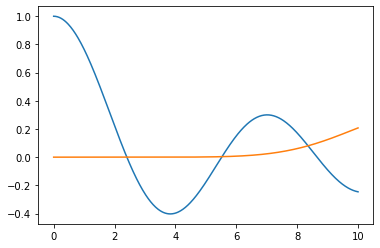

In [11]:
# test for Bessel
x = np.linspace(0,10,500)
y_0 = spl.jv(0,x)
y_3 = spl.jv(10,x)
plt.plot(x,y_0,x,y_3,'-')
plt.show()




In [12]:
# Test of distribution functions
# Bi-Maxwellian distribution
import numpy as np
from astropy import units as u
import plasmapy
import matplotlib.pyplot as plt
from plasmapy.constants import (m_p, m_e, c, mu0, k_B, e, eps0, pi, e)

from plasmapy.physics.distribution import Maxwellian_speed_1D

from astropy.visualization import quantity_support
quantity_support()

speed = Maxwellian_speed_1D(v=1 * u.m / u.s,
                       T=30 * u.K,
                       particle='e',
                       v_drift=0 * u.m / u.s)
print(p_dens)

T = 3e4 * u.K
dv = 10 * u.m / u.s
v = np.arange(-5e6, 5e6, 10) * u.m / u.s


for particle in ['p', 'e']:
    pdf = Maxwellian_speed_1D(v, T=T, particle=particle)
    integral = (pdf).sum() * dv
    print(f"Integral value for {particle}: {integral}")
    plt.plot(v, pdf, label=particle)
plt.legend()
# def bi_maxwellian distribution

NameError: name 'p_dens' is not defined

In [ ]:
# test the range of k_parall

In [ ]:
L,R,P = cold_plasma_permittivity_LRP(B,species, n , frequency_wave)
B_new = 

In [58]:
omega_ce  = 15000 *math.pi *2
print(omega_ce)

94247.7796076938


In [64]:
B_new =1 *10**-4*omega_ce/(1.76*10**7)
print(B_new)

5.354987477709875e-07


In [65]:
B_new = B_new*u.T

In [136]:
pro_gyrofrequency = parameters.gyrofrequency(B_new,'p')
ele_gyrofrequency = parameters.gyrofrequency(B_new,'e')
print(ele_gyrofrequency)
print(pro_gyrofrequency)

94184.59201934762 rad / s
51.29453196638421 rad / s


In [139]:
omega_13 = 0.5 * pro_gyrofrequency
B_13 = B_new
species_13 = ['e','p']
n_13 = [10e6 *u.m**-3,10e6 *u.m**-3]
L_13,R_13,P_13 = cold_plasma_permittivity_LRP(B_13,species_13, n_13 , omega_13)
print(L_13)
kc = L_13**0.5*omega_13
print(kc)


13179.935681227169
2944.406184453979 rad / s


In [140]:
from scipy.optimize import fsolve

a = solve((1 - x**-2)**0.5 -(omega_13.value + (ele_gyrofrequency.value/x))/kc.value )
print(a)


[32.2843395933125]


In [149]:
def B_L(L):
    B_L = (0.3e-4/(L**3) )* u.T
    return B_L

In [173]:
omega_14 = 2000*2*math.pi*u.rad/u.s
B_14 = B_L(6)
species_14 = ['e','p']
n_14 = [10e6 *u.m**-3,10e6 *u.m**-3]
L_14,R_14,P_14 = cold_plasma_permittivity_LRP(B_14,species_14, n_14 , omega_14)
kc_14 = R_14**0.5*omega_14
a = solve((1 - x**-2)**0.5 +(omega_14.value - (ele_gyrofrequency.value/x))/kc_14.value )
print(kc_14)

print(a)
v = omega_14*const.c/ kc_14
print("v,",v)
E_landau = (9.10938356e-31/2) * v.value**2 *6.242e15
print("E_Landau(kev)",E_landau)
E_res = (a[0] - 1) *511
print("E_res(kev)",E_res)

184003.83930340348 rad / s
[1.09144460613810]
v, 20474046.350771025 m / s
E_Landau(kev) 1.191763614213011
E_res(kev) 46.7281937365713


In [165]:
(1.01515197992504 - 1 )*511

7.742661741695397